In [96]:
from modular_matrix import *
from transition_helpers import *
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from figure_grid import *

In [2]:
def each_possible_grid(rows, cols, mod):
    # each grid can be thought of as a number in base mod
    for i in range(mod**(rows*cols)):
        grid = np.zeros(rows*cols)
        j = len(grid)-1
        while i > 0:
            grid[j] = i % mod
            i = i // mod
            j -= 1
        yield grid.reshape((rows, cols))

In [3]:
def cycle_information(A, grid):
    try:
        b = grid.ravel()
        seen = [tuple(b.astype(int))]
        while True:
            b = A.solve(b)
            sight = tuple(b.astype(int))
            if sight in seen:
                return len(seen), seen.index(sight)
            else:
                seen.append(sight)
    except SingularMatrixError:
        return 0, 0

In [10]:
adj = lambda i, j: [[i,j,1],[i+1,j,1],[i-1,j,1],[i,j+1,1],[i,j-1,1]]

def results_for_mod(k, n, m):
    A = transition_matrix(adj, n, m, k)
    if A.nullity() > 0:
        return False
    cycles = []
    eigvecs = []
    for grid in each_possible_grid(n, m, k):
        length, index = cycle_information(A, grid)
        cycles.append((length, index))
        if length == 1:
            eigvecs.append(grid)
    return Counter(cycles), eigvecs

In [34]:
def summarize_results_for_mod(k, n, m):
    counts, eigvecs = results_for_mod(k, n, m)
    vals, weights = zip(*[(key[0], val) for key, val in counts.items()])
    plt.hist(vals, weights=weights, bins=range(min(vals),max(vals)+2))
    plt.show()

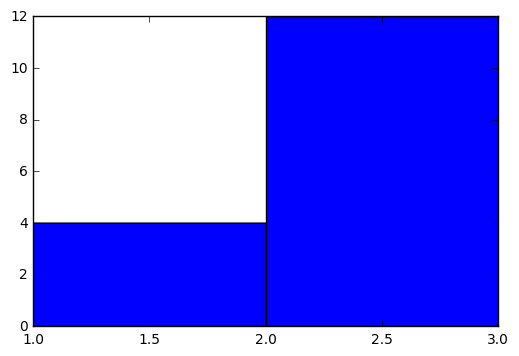

In [35]:
summarize_results_for_mod(2, 2, 2)

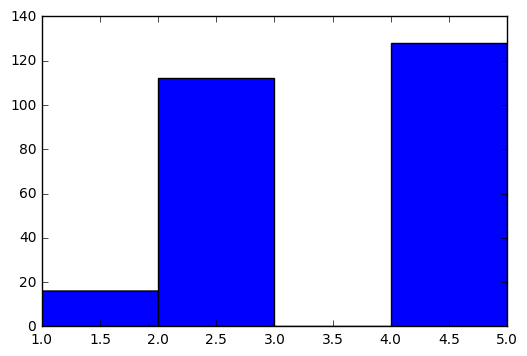

In [37]:
summarize_results_for_mod(4, 2, 2)

In [77]:
results_for_mod(5,1,1)

(Counter({(1, 0): 5}),
 [array([[ 0.]]),
  array([[ 1.]]),
  array([[ 2.]]),
  array([[ 3.]]),
  array([[ 4.]])])

In [68]:
results_for_mod(3,2,2)

False

In [78]:
results_for_mod(4,3,3)

KeyboardInterrupt: 

In [65]:
results_for_mod(3,5,5)

False

In [55]:
results_for_mod(3, 3, 3)

(Counter({(1, 0): 27, (8, 0): 19656}), [array([[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]), array([[ 0.,  0.,  1.],
         [ 0.,  2.,  0.],
         [ 1.,  0.,  0.]]), array([[ 0.,  0.,  2.],
         [ 0.,  1.,  0.],
         [ 2.,  0.,  0.]]), array([[ 0.,  1.,  0.],
         [ 2.,  0.,  2.],
         [ 0.,  1.,  0.]]), array([[ 0.,  1.,  1.],
         [ 2.,  2.,  2.],
         [ 1.,  1.,  0.]]), array([[ 0.,  1.,  2.],
         [ 2.,  1.,  2.],
         [ 2.,  1.,  0.]]), array([[ 0.,  2.,  0.],
         [ 1.,  0.,  1.],
         [ 0.,  2.,  0.]]), array([[ 0.,  2.,  1.],
         [ 1.,  2.,  1.],
         [ 1.,  2.,  0.]]), array([[ 0.,  2.,  2.],
         [ 1.,  1.,  1.],
         [ 2.,  2.,  0.]]), array([[ 1.,  0.,  0.],
         [ 0.,  2.,  0.],
         [ 0.,  0.,  1.]]), array([[ 1.,  0.,  1.],
         [ 0.,  1.,  0.],
         [ 1.,  0.,  1.]]), array([[ 1.,  0.,  2.],
         [ 0.,  0.,  0.],
         [ 2.,  0.,  1.]]), array([[ 1.,  1.,  0.],


In [90]:
from collections import defaultdict
def results_for_mod2(k, n, m):
    A = transition_matrix(adj, n, m, k)
    if A.nullity() > 0:
        return False
    cycles = defaultdict(list)
    for grid in each_possible_grid(n, m, k):
        length, index = cycle_information(A, grid)
        cycles[(length, index)].append(grid)
    return cycles

In [92]:
r = results_for_mod2(6, 2, 2)

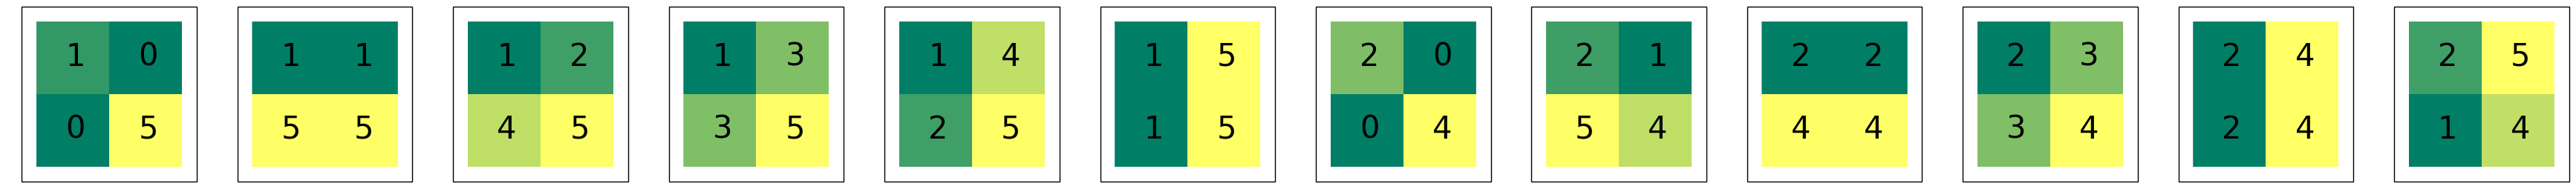

In [240]:
def plot_state(s,t=0.1,fs=30):
    plt.axis('off')
    for i in range(len(s)):
        for j in range(len(s[0])):
            plt.gca().text(i-t, j+t, int(s[j][i]), fontsize=fs)
    plt.imshow(s, cmap='summer', interpolation='none')
    
with figure_grid(1,12, rowheight=2.5, rowwidth=35) as grid:
    for eig in r[(1,0)]:
        grid.next_subplot()
        plot_state(eig)
        
        sub = plt.gca()
        ax = sub.axis()
        width = ax[1]-ax[0]
        height = ax[3]-ax[2]
        rec = plt.Rectangle(
            (ax[0]-0.1*width, ax[2]-0.1*height),
            1.2*width,
            1.2*height,
            fill=False,lw=1)
        rec = sub.add_patch(rec)
        rec.set_clip_on(False)

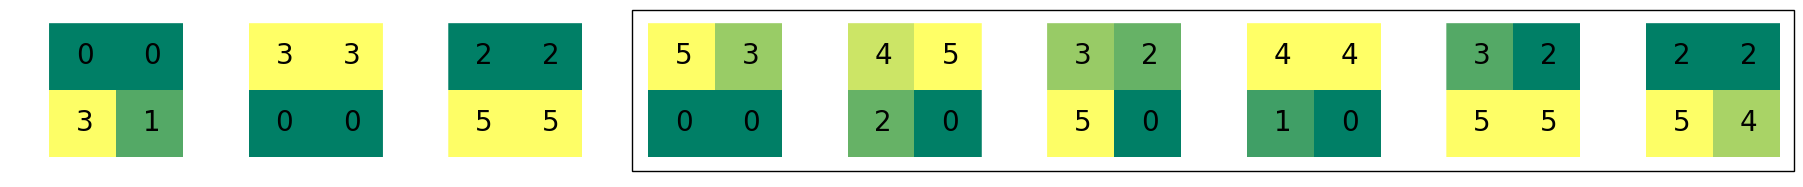

In [244]:
A = transition_matrix(adj, 2, 2, 6)
s = r[(9,3)][0]
with figure_grid(1,10, rowheight=2.5,rowwidth=20) as grid:
    grid.next_subplot()
    plot_state(s, fs=20)
    for _ in range(8):
        s=A.solve(s.ravel()).reshape(s.shape)
        grid.next_subplot()
        plot_state(s,fs=20)
        
    sub = plt.gca()
    ax = sub.axis()
    width = ax[1]-ax[0]
    height = ax[3]-ax[2]
    rec = plt.Rectangle(
            (ax[0]-7.55*width, ax[2]-0.1*height),
            8.65*width,
            1.2*height,
            fill=False,lw=1)
    rec = sub.add_patch(rec)
    rec.set_clip_on(False)

In [197]:
chains = []

for s in r[(6,0)]:
    stuple = tuple(s.ravel())
    
    already_counted = False
    for chain in chains:
        if stuple in chain:
            already_counted = True
            break
    if already_counted:
        continue
      
    chain = []
    while stuple not in chain:
        s = A.solve(s.ravel()).reshape(s.shape)
        chain.append(tuple(s.ravel()))
    #chain = [stuple] + chain
    chains.append(chain)

len(chains)

12

In [205]:
def draw_axis_border(sub):
    ax = sub.axis()   
    rec = plt.Rectangle((ax[0]-0.7,ax[2]-0.2),(ax[1]-ax[0])+1,(ax[3]-ax[2])+0.4,fill=False,lw=1)
    rec = sub.add_patch(rec)
    rec.set_clip_on(False)

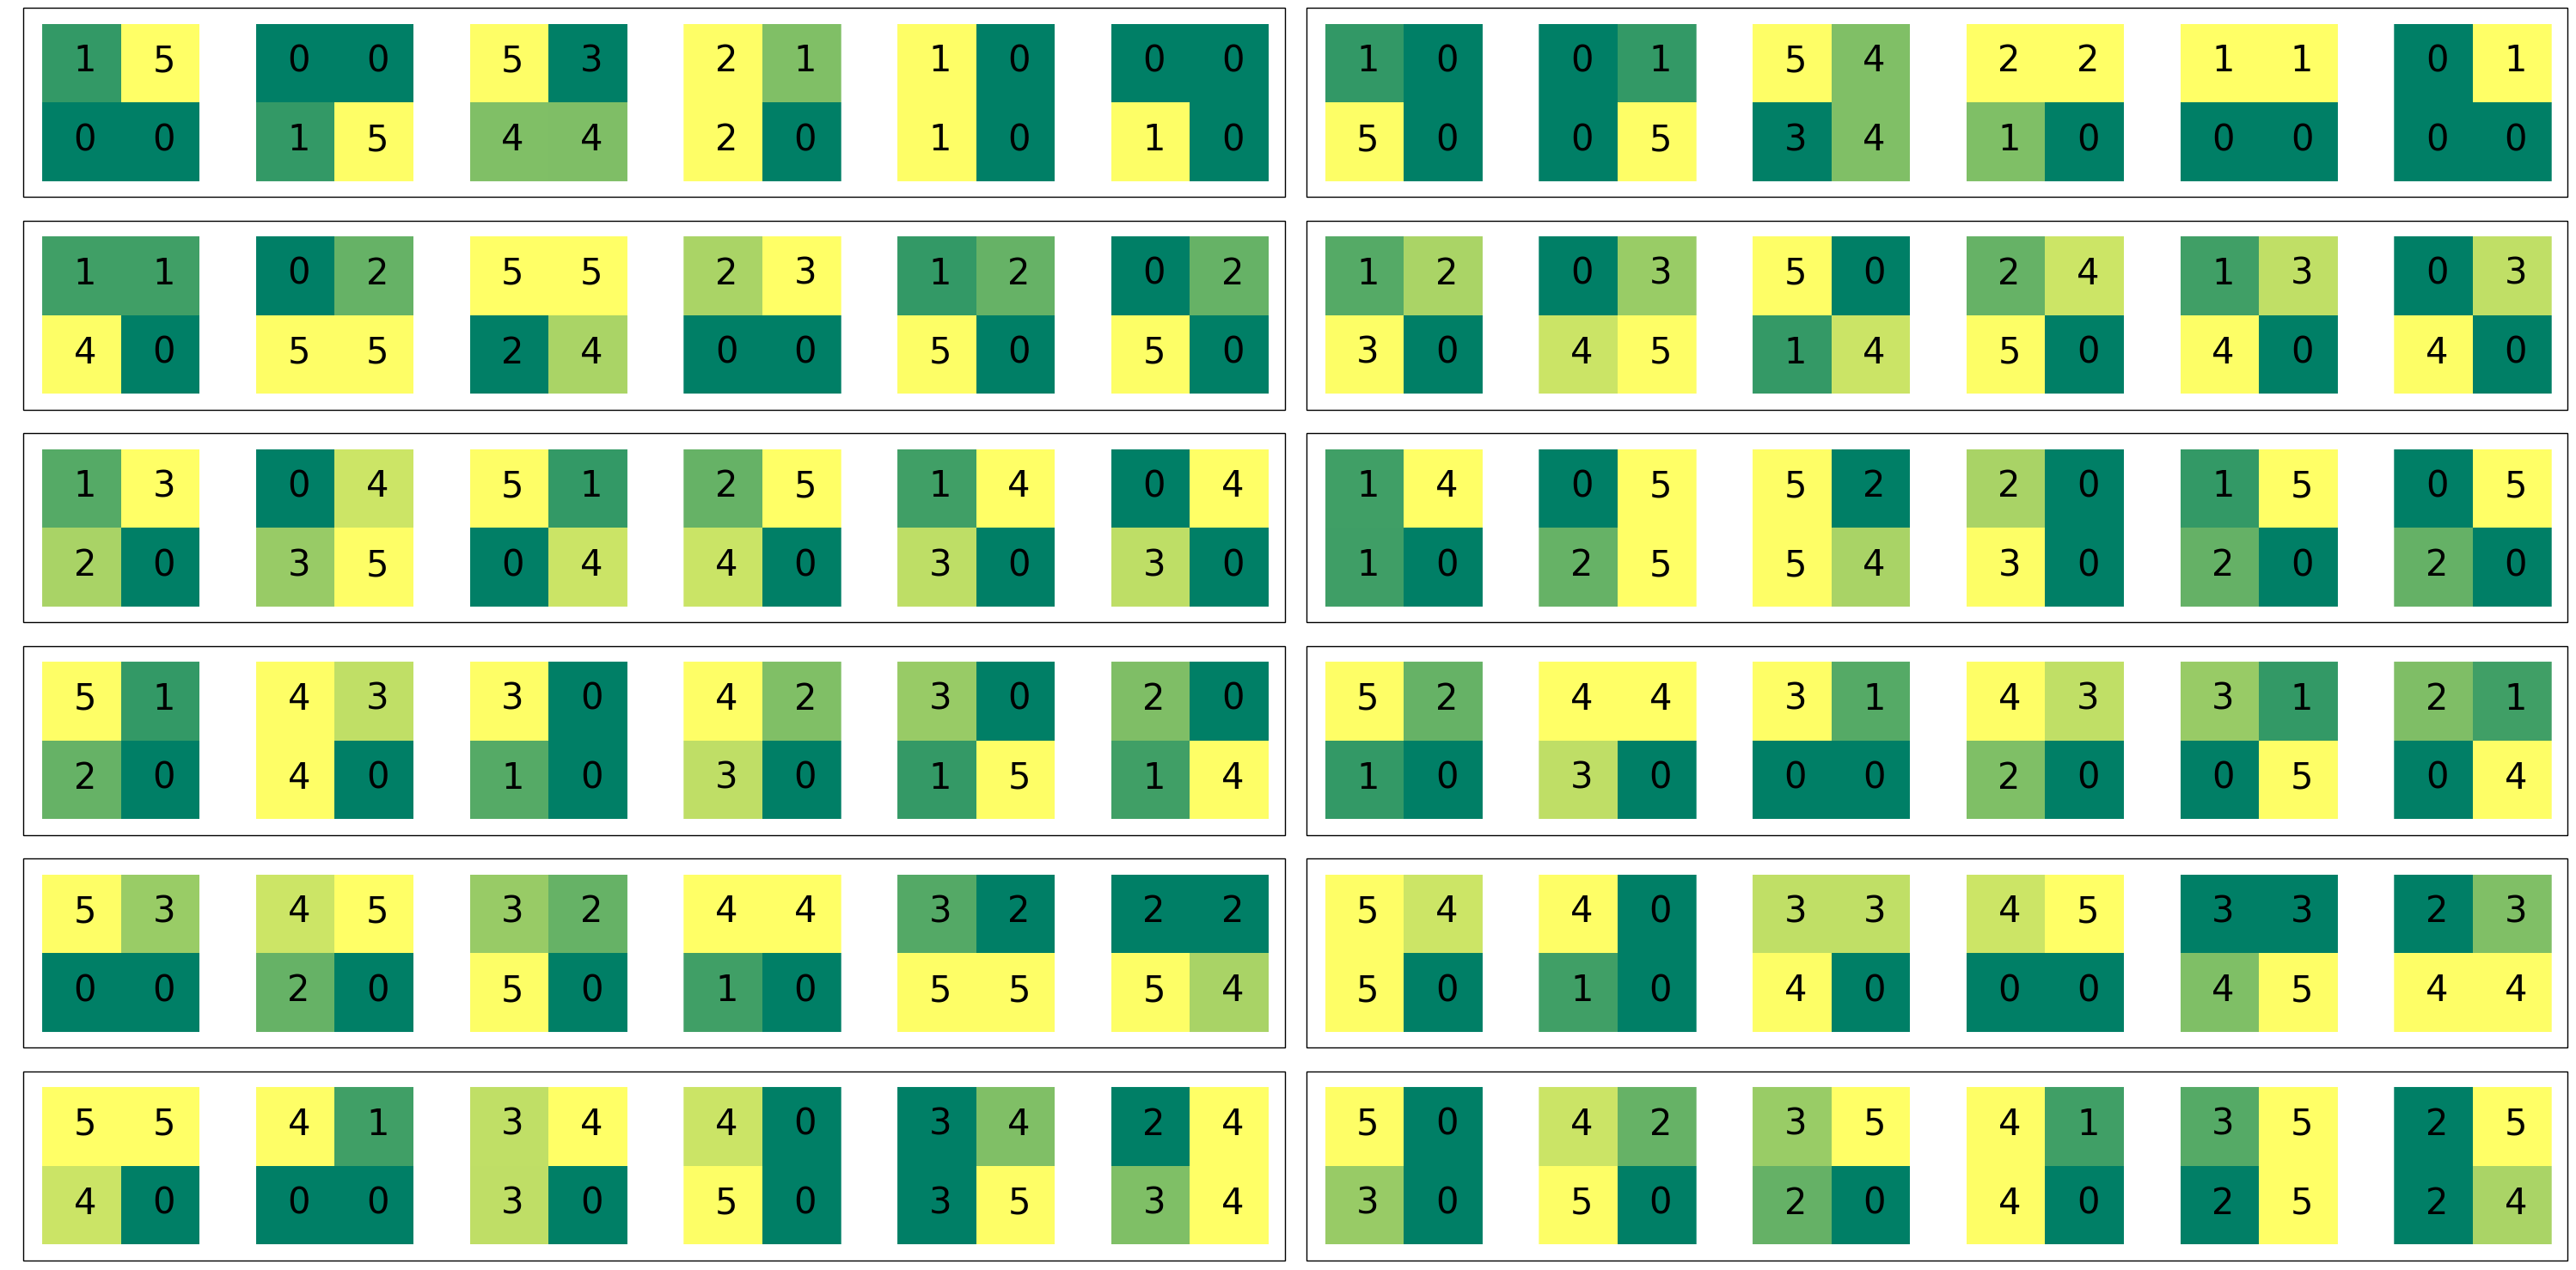

In [218]:
with figure_grid(6,12, rowheight=2.5,rowwidth=30) as grid:
    for chain in chains:
        for s in chain:
            grid.next_subplot()
            plot_state(np.array(s).reshape(2,2))
        sub = plt.gca()
        ax = sub.axis()
        width = ax[1]-ax[0]
        height = ax[3]-ax[2]
        rec = plt.Rectangle(
            (ax[0]-6.9*width, ax[2]-0.1*height),
            8*width,
            1.2*height,
            fill=False,lw=1)
        rec = sub.add_patch(rec)
        rec.set_clip_on(False)

In [253]:
results_for_mod(9, 2, 2)

(Counter({(1, 0): 27,
          (2, 0): 54,
          (6, 0): 54,
          (7, 1): 180,
          (8, 2): 63,
          (9, 3): 108,
          (10, 4): 90,
          (11, 5): 99,
          (12, 6): 207,
          (13, 7): 216,
          (14, 0): 126,
          (14, 8): 234,
          (15, 1): 405,
          (15, 9): 243,
          (16, 2): 135,
          (16, 10): 252,
          (17, 3): 36,
          (17, 11): 189,
          (18, 4): 18,
          (18, 12): 261,
          (19, 5): 54,
          (19, 13): 252,
          (20, 6): 72,
          (20, 14): 207,
          (21, 7): 90,
          (21, 15): 243,
          (22, 8): 135,
          (22, 16): 225,
          (23, 9): 144,
          (23, 17): 180,
          (24, 10): 153,
          (24, 18): 99,
          (25, 11): 216,
          (25, 19): 45,
          (26, 12): 189,
          (26, 20): 9,
          (27, 13): 198,
          (27, 21): 54,
          (28, 14): 279,
          (28, 22): 18,
          (29, 15): 216,
          (30, 16): 

In [210]:
results_for_mod(6, 2, 2)

(Counter({(1, 0): 12,
          (2, 0): 36,
          (6, 0): 72,
          (7, 1): 144,
          (8, 0): 96,
          (8, 2): 48,
          (9, 1): 180,
          (9, 3): 108,
          (10, 2): 60,
          (10, 4): 84,
          (11, 3): 72,
          (11, 5): 72,
          (12, 4): 60,
          (12, 6): 60,
          (13, 5): 60,
          (13, 7): 24,
          (14, 6): 60,
          (14, 8): 12,
          (15, 7): 36}),
 [array([[ 1.,  0.],
         [ 0.,  5.]]), array([[ 1.,  1.],
         [ 5.,  5.]]), array([[ 1.,  2.],
         [ 4.,  5.]]), array([[ 1.,  3.],
         [ 3.,  5.]]), array([[ 1.,  4.],
         [ 2.,  5.]]), array([[ 1.,  5.],
         [ 1.,  5.]]), array([[ 2.,  0.],
         [ 0.,  4.]]), array([[ 2.,  1.],
         [ 5.,  4.]]), array([[ 2.,  2.],
         [ 4.,  4.]]), array([[ 2.,  3.],
         [ 3.,  4.]]), array([[ 2.,  4.],
         [ 2.,  4.]]), array([[ 2.,  5.],
         [ 1.,  4.]])])

In [230]:
cnt = results_for_mod(6, 2, 2)[0]

In [238]:
sum(cnt.values())

1296

In [259]:
A = transition_matrix(adj, 2, 2, 6)
int(round(np.linalg.det(A.array)))

-3

In [263]:
import math
math.gcd(-3, 3)

3

In [83]:
P,L,U=A.lu_cache

In [88]:
(P*A).array

array([[1, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 1]], dtype=int32)

In [89]:
(L*U).array

array([[1, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 1]], dtype=int32)

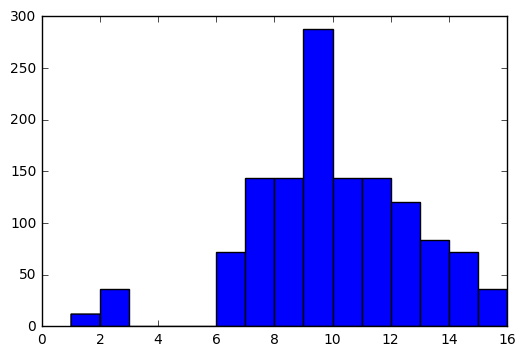

In [39]:
summarize_results_for_mod(6, 2, 2)